In [1]:
#this opens a cvs file, removes scientific notation, and tells us the row and column size of the table
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df = pd.read_csv('item.csv')
df.shape

(153, 12)

In [2]:
#this eliminates assets with matching asset tags
bool_mask = df[(~df.duplicated(subset="serial")) | (df['serial'].isnull())]

In [3]:
#this shows the sum of each category minus any duplicates
bool_mask.groupby(['make','model']).sum().drop(['cost','deployed'],axis=1)

quantity
make   model                                         
hp     chromebook                                  30
       elitebook intel core i5                      2
       elitebook intel core i5 vpro                14
       elitebook intel core i5 vpro 8th gen        10
       elitebook intel core i7                      1
       elitebook intel core i7 vpro                34
       zbook intel core i7 vpro                    13
       zbook intel core i7 vpro 9th gen             2
lenovo thinkpad e14 gen 2                          47

In [4]:
#this gives a total number of each unique item
bool_mask['item'].value_counts()

laptop    153
Name: item, dtype: int64

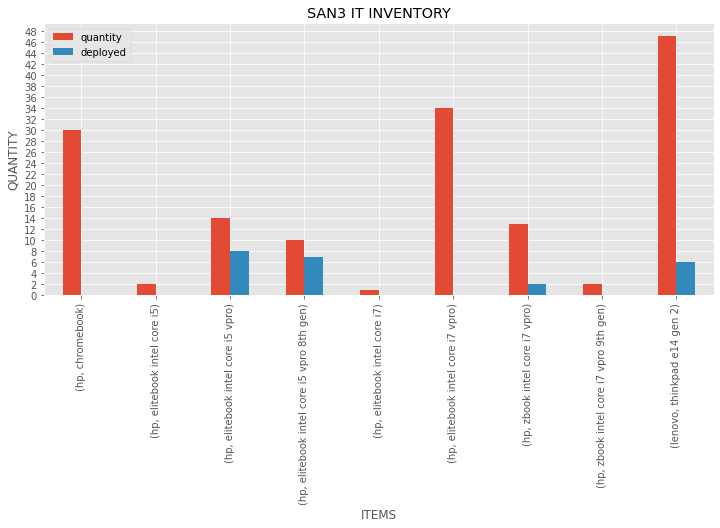

In [5]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

dfg = bool_mask.groupby(['make','model']).sum().drop(['cost'],axis=1)

dfg.plot(kind='bar', title='SAN3 IT INVENTORY', ylabel='QUANTITY',
         xlabel='ITEMS', figsize=(12, 5)).locator_params(nbins=25)

In [6]:
bool_mask.groupby('model').sum().drop(['cost','deployed'],axis=1)

,quantity
model,
chromebook,30
elitebook intel core i5,2
elitebook intel core i5 vpro,14
elitebook intel core i5 vpro 8th gen,10
elitebook intel core i7,1
elitebook intel core i7 vpro,34
thinkpad e14 gen 2,47
zbook intel core i7 vpro,13
zbook intel core i7 vpro 9th gen,2


<AxesSubplot:ylabel='cost'>

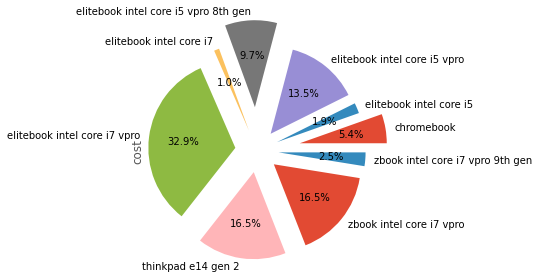

In [7]:
bool_mask.groupby(['model']).sum().plot(kind='pie', y='cost',autopct='%1.1f%%',legend=0,explode=[.5,.25,.25,.5,.25,.25,.25,.25,.25])

In [8]:
bool_mask.groupby(['make','model','cost']).sum().drop(['deployed'],axis=1)

quantity
make   model                                cost          
hp     chromebook                           360         30
       elitebook intel core i5              1924         2
       elitebook intel core i5 vpro         1924        14
       elitebook intel core i5 vpro 8th gen 1924        10
       elitebook intel core i7              1924         1
       elitebook intel core i7 vpro         1924        34
       zbook intel core i7 vpro             2529        13
       zbook intel core i7 vpro 9th gen     2529         2
lenovo thinkpad e14 gen 2                   700         47

In [9]:
bool_mask.groupby(['make','model']).sum().drop(['deployed'],axis=1)

quantity   cost
make   model                                                
hp     chromebook                                  30  10800
       elitebook intel core i5                      2   3848
       elitebook intel core i5 vpro                14  26936
       elitebook intel core i5 vpro 8th gen        10  19240
       elitebook intel core i7                      1   1924
       elitebook intel core i7 vpro                34  65416
       zbook intel core i7 vpro                    13  32877
       zbook intel core i7 vpro 9th gen             2   5058
lenovo thinkpad e14 gen 2                          47  32900

In [10]:
bool_mask['cost'].sum()

198999